In [141]:
import nltk

nltk.download([
"names",
     "stopwords",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns



[nltk_data] Downloading package names to /home/manfred/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manfred/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/manfred/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/manfred/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/manfred/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [142]:
cleaned = 1
if cleaned:
    reviews = pd.read_csv('reviews_1k_cleaned.csv', delimiter=";")
else:
    reviews = pd.read_csv('reviews_1k.csv', delimiter=";")
reviews.head()

,Unnamed: 0,game_name,review_text,hours_played,rating,found_helpful,product_count,review_date,early_access,review_length
0,0,For The Warp,good game i feel the graphics vibe of into the...,10.9,1.0,0.0,127.0,"12 September, 2021",True,441
1,1,For The Warp,brilliant little game had so much fun with it ...,6.1,1.0,0.0,117.0,"19 July, 2021",True,109
2,2,For The Warp,solid deck building space exploration/combat a...,7.7,1.0,0.0,42.0,"22 January, 2021",True,63
3,3,For The Warp,often absolutely dependent on luck in the firs...,14.3,1.0,0.0,212.0,"05 April, 2020",True,277
4,4,For The Warp,a nice game which lacks some polish at the mom...,5.7,1.0,0.0,1289.0,"23 August, 2020",True,466


In [143]:
X = reviews.drop('rating', axis=1)
y = reviews.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [144]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def is_positive(review: str) -> int:
    """True if tweet has positive compound sentiment, False otherwise."""
    #return sia.polarity_scores(review)["compound"] > 0
    sentiment = 0
    if sia.polarity_scores(review)["compound"] > 0:
        sentiment = 1

    return sentiment

sentiments = X_test.review_text.map(lambda review: is_positive(review))

sentiments

989     1
2690    1
1043    1
1983    0
3750    0
       ..
743     1
476     1
3031    1
456     1
3004    0
Name: review_text, Length: 1265, dtype: int64

[[174  81]
 [307 703]]


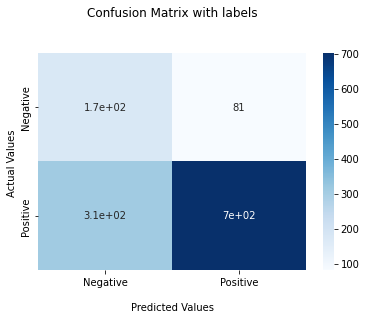


Classification Report
              precision    recall  f1-score   support

         0.0       0.36      0.68      0.47       255
         1.0       0.90      0.70      0.78      1010

    accuracy                           0.69      1265
   macro avg       0.63      0.69      0.63      1265
weighted avg       0.79      0.69      0.72      1265



In [145]:
cf_matrix = confusion_matrix(y_test, sentiments)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Classification Report
print("\nClassification Report")
report = classification_report(y_test, sentiments)
print(report)
